<a href="https://colab.research.google.com/github/esramostafa20/Regression-Models-/blob/main/01_simple_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Simple Linear Regression
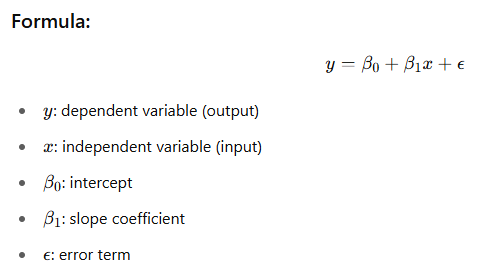

## When to use:
1. When you want to model a linear relationship between one feature
x and the target 𝑦
2. Data is continuous and roughly linear.

3. Errors/residuals are normally distributed and homoscedastic (constant variance).

## When not to use:
1. Relationship is clearly non-linear.

2. You have multiple features (then use multiple linear regression).

3. When residuals show patterns (violating linear regression assumptions).



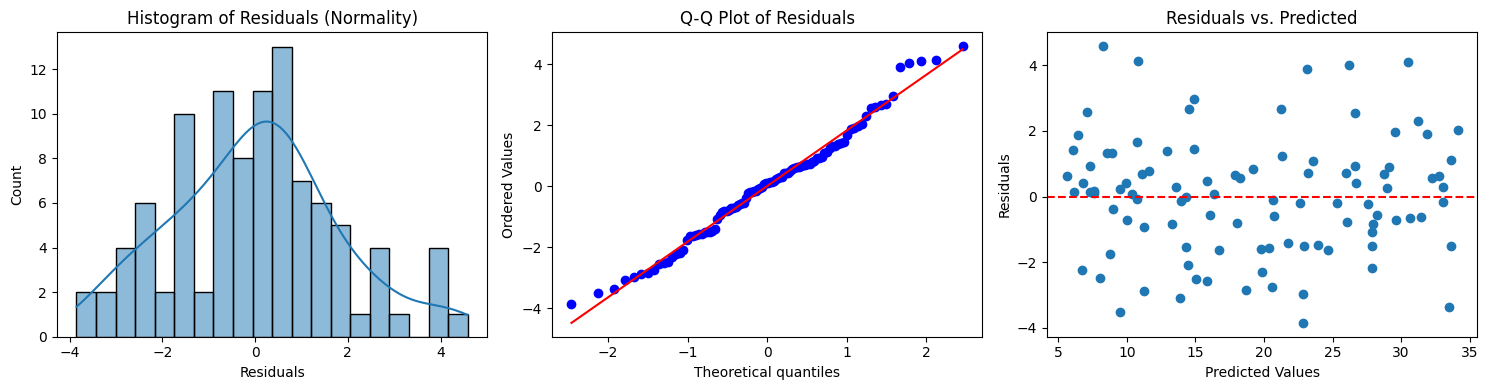

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from scipy import stats

# Generate example data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # X from 0 to 10
y = 3 * X.squeeze() + 5 + np.random.normal(0, 2, 100)  # Linear with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot 1: Histogram of residuals (Check normality)
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(residuals, kde=True, bins=20)
plt.title("Histogram of Residuals (Normality)")
plt.xlabel("Residuals")

# Plot 2: Q-Q plot (another normality check)
plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

# Plot 3: Residuals vs Predicted values (Check homoscedasticity)
plt.subplot(1, 3, 3)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


## 1. Histogram of Residuals
Purpose: Check if the residuals are normally distributed.

What to look for:
The histogram should look like a bell curve (symmetric around 0).

It means most of your model’s errors are small, and large errors are rare.

Example Interpretation:
✅ Good: Smooth bell shape centered at 0.
❌ Bad: Skewed shape or strange peaks — suggests non-normal errors (bad for stats like p-values).

## 2. Q-Q Plot (Quantile-Quantile Plot)
Purpose: Also checks normality of residuals, in a different way.

What to look for:
Points should fall on or close to the diagonal line.

The more they follow the line, the more normally distributed your residuals are.

Example Interpretation:
✅ Good: Most points lie on the line.
❌ Bad: Curved or off-line points — suggests skewness or heavy tails (non-normal).


## 3. Residuals vs. Predicted Values Plot
Purpose: Checks for homoscedasticity (constant variance of residuals).

What to look for:
Points should form a horizontal cloud centered around 0.

There should be no clear pattern or shape (like a cone, U, etc.).

 Example Interpretation:
 ✅ Good: Points randomly spread out above and below 0 — constant variance.

❌ Bad: Funnel/cone shapes, curves, or increasing/decreasing spread — means heteroscedasticity (bad).

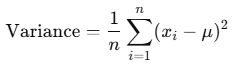

## What We'll Do:
1. Import the data

2. Explore and clean the data (EDA)

3. Visualize relationships

4. Build a linear regression model

5. Evaluate model + residual analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [4]:
# Loading the data
df=fetch_california_housing()

In [5]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
data = pd.DataFrame(df.data, columns=df.feature_names)
data['MedHouseVal']=df.target

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


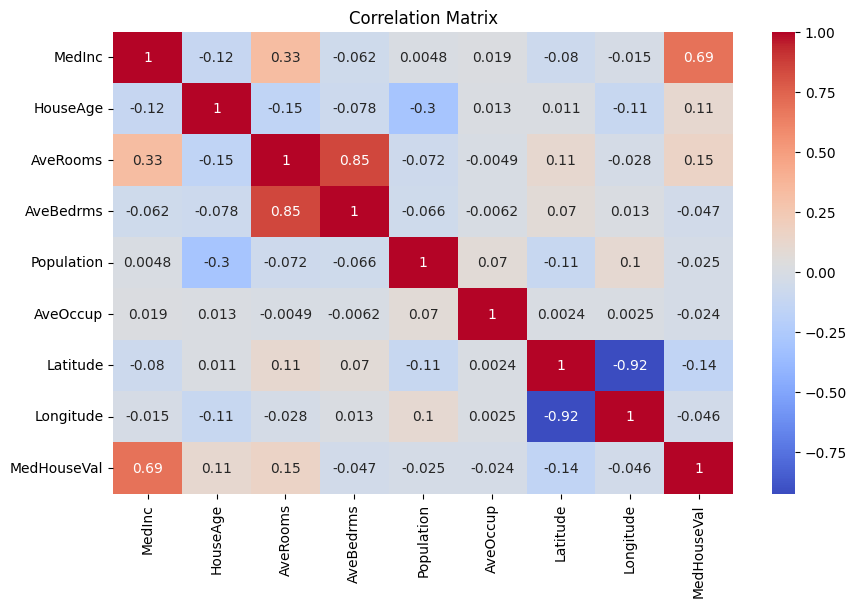

In [8]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Correlation** measures the strength and direction of a linear relationship between two variables.

It ranges from -1 to +1:

1. +1: perfect positive correlation

2. 0: no correlation

3. -1: perfect negative correlation

In [21]:
correlations = data.corr()['MedHouseVal'].sort_values(ascending=False)

print(correlations)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


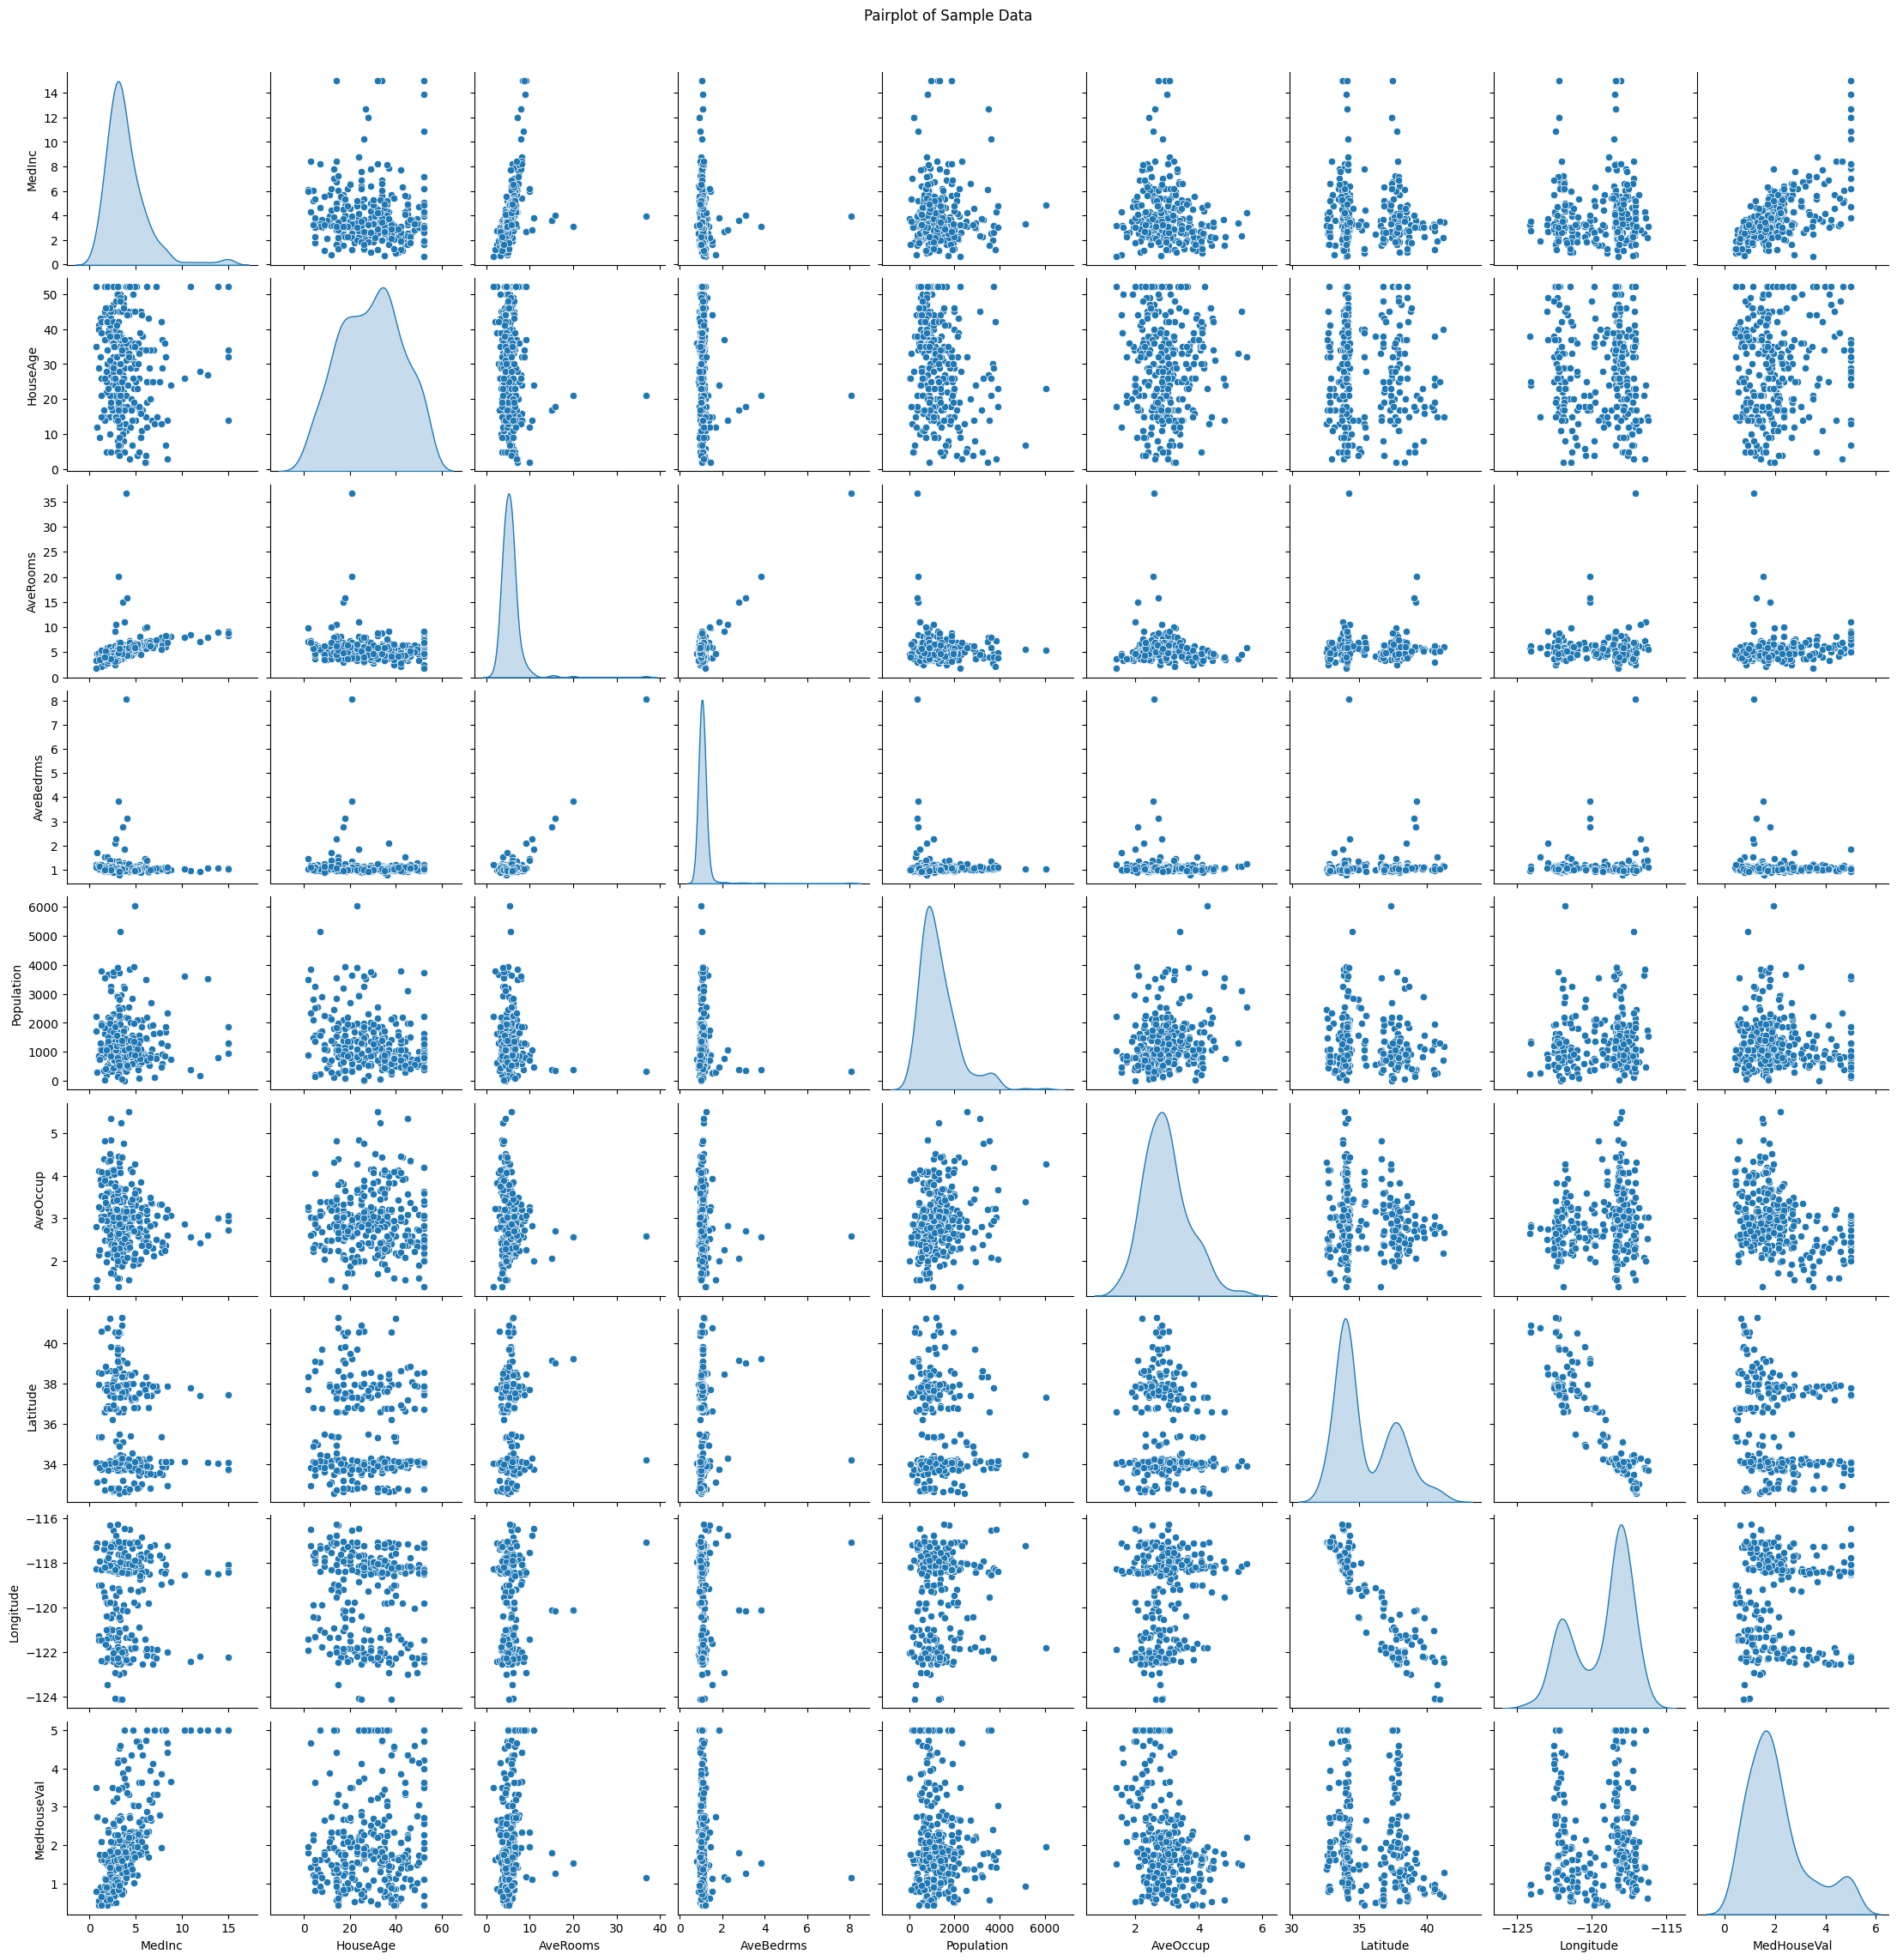

In [9]:
# Pairplot (optional, small sample for speed)
sns.pairplot(data.sample(300), diag_kind='kde')
plt.suptitle("Pairplot of Sample Data", y=1.02)
plt.show()

In [10]:
#  Select Features (just use 1 feature for simple linear regression)
X = data[['MedInc']]  # Median Income
y = data['MedHouseVal']  # Median House Value

In [11]:
#  Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
#  Predictions
y_pred = model.predict(X_test)

In [14]:
#  Evaluation
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")


Model Coefficients:
Intercept: 0.44
Slope: 0.42


In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.71
R² Score: 0.46


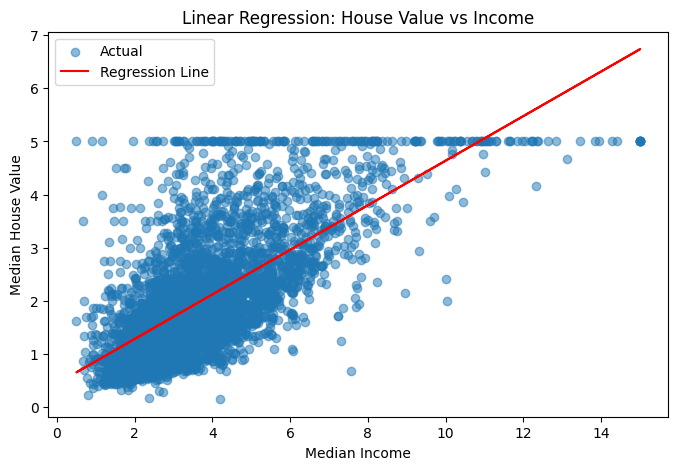

In [16]:
#  Plot Regression Line
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, label="Actual", alpha=0.5)
plt.plot(X_test, y_pred, color='red', label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression: House Value vs Income")
plt.legend()
plt.show()

In [17]:
#  Residual Analysis
residuals = y_test - y_pred

Text(0.5, 1.0, 'Residuals Distribution')

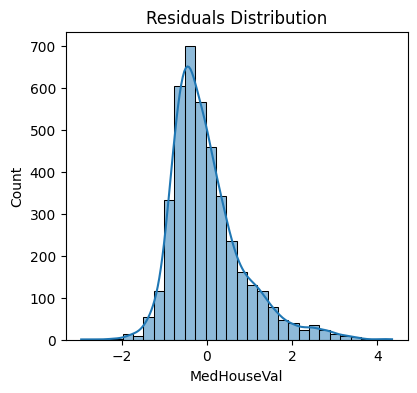

In [18]:
# Residuals Histogram
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")

Text(0.5, 1.0, 'Q-Q Plot')

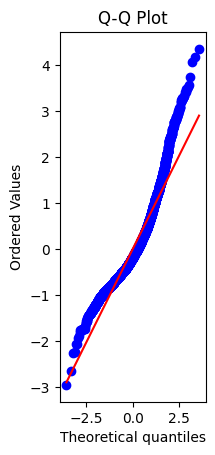

In [19]:
# Q-Q Plot
plt.subplot(1,3,2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")

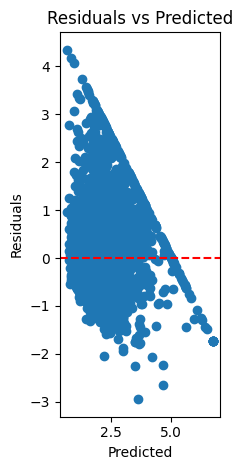

In [20]:
# Residuals vs Predicted
plt.subplot(1,3,3)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()